# Recommender System

> ## Collaborative Filtering
>
> ### 2022-1 AI Capstone Ratio Project

### Duration

2022-03-02 ~ 2022-06-07

### Reference

서주안 팀원의 코드 + 사용자-타일 csv 데이터 파일

In [1]:
import pandas as pd
import numpy as np

from sklearn.utils.extmath import randomized_svd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
mapoTilePairCount = pd.read_csv('./tilePairCount_ㅡmapo_visitor.csv')
mapoTilePairCount

,user,tilePair,count,visitor
0,yjCBTfEVL0dwmUFzU3GvqroV0XC3,"('55906', '25388')",6,29
1,yjCBTfEVL0dwmUFzU3GvqroV0XC3,"('55907', '25385')",8,26
2,yjCBTfEVL0dwmUFzU3GvqroV0XC3,"('55908', '25385')",8,27
3,yjCBTfEVL0dwmUFzU3GvqroV0XC3,"('55920', '25375')",28,27
4,yjCBTfEVL0dwmUFzU3GvqroV0XC3,"('55905', '25388')",6,29
...,...,...,...,...
55578,0ChSzKE66sQX8VyC96HbVj3dK3e2,"('56305', '25736')",1,1
55579,0ChSzKE66sQX8VyC96HbVj3dK3e2,"('56327', '25714')",1,2
55580,0ChSzKE66sQX8VyC96HbVj3dK3e2,"('56319', '25726')",1,2
55581,0ChSzKE66sQX8VyC96HbVj3dK3e2,"('56326', '25717')",1,1


In [3]:
mapoTilePairCount = mapoTilePairCount.drop(mapoTilePairCount[mapoTilePairCount.visitor == 1].index)
mapoTilePairCount

,user,tilePair,count,visitor
0,yjCBTfEVL0dwmUFzU3GvqroV0XC3,"('55906', '25388')",6,29
1,yjCBTfEVL0dwmUFzU3GvqroV0XC3,"('55907', '25385')",8,26
2,yjCBTfEVL0dwmUFzU3GvqroV0XC3,"('55908', '25385')",8,27
3,yjCBTfEVL0dwmUFzU3GvqroV0XC3,"('55920', '25375')",28,27
4,yjCBTfEVL0dwmUFzU3GvqroV0XC3,"('55905', '25388')",6,29
...,...,...,...,...
55576,0ChSzKE66sQX8VyC96HbVj3dK3e2,"('56327', '25717')",1,2
55577,0ChSzKE66sQX8VyC96HbVj3dK3e2,"('56319', '25725')",1,2
55579,0ChSzKE66sQX8VyC96HbVj3dK3e2,"('56327', '25714')",1,2
55580,0ChSzKE66sQX8VyC96HbVj3dK3e2,"('56319', '25726')",1,2


In [4]:
mapoTilePairCount = mapoTilePairCount.drop(mapoTilePairCount[mapoTilePairCount.tilePair == "('tileIdX', 'tileIdY')"].index)
A = mapoTilePairCount.set_index(['tilePair','user'])['count'].unstack().replace(np.nan, 0)
print(f'The Shape of A: {A.shape}')

The Shape of A: (10216, 84)


In [5]:
k = 50

U, Sigma, VT = randomized_svd(A.values, n_components=k, n_iter=5, random_state=None)
print(U.shape, Sigma.shape, VT.shape)

S = np.diag(Sigma)
A_approx_svd = np.matmul(np.matmul(U,S), VT)
test = np.matmul(U,VT)

print(pd.DataFrame(A_approx_svd))
print(A_approx_svd.shape)

(10216, 50) (50,) (50, 84)
             0         1         2         3         4         5         6   \
0     -0.023776  0.000009 -0.023437  0.000133 -0.001657  0.002796  0.998019   
1     -0.003407 -0.000005 -0.009370 -0.000120 -0.000434 -0.000160 -0.000134   
2      0.008727  0.000030  0.008519 -0.000403  0.000179 -0.003537 -0.000046   
3      0.000100  0.999828  0.001076 -0.000063 -0.000095 -0.000361 -0.000041   
4      0.000100  0.999828  0.001076 -0.000063 -0.000095 -0.000361 -0.000041   
...         ...       ...       ...       ...       ...       ...       ...   
10211 -0.000556  0.999834  0.000240 -0.000005  0.000083 -0.000068 -0.000004   
10212 -0.000556  0.999834  0.000240 -0.000005  0.000083 -0.000068 -0.000004   
10213 -0.000556  0.999834  0.000240 -0.000005  0.000083 -0.000068 -0.000004   
10214 -0.000556  0.999834  0.000240 -0.000005  0.000083 -0.000068 -0.000004   
10215 -0.000556  0.999834  0.000240 -0.000005  0.000083 -0.000068 -0.000004   

             7         8

In [6]:
userFreqEmbedding = VT.transpose()
print(f'The Shape of User Embedding: {userFreqEmbedding.shape}')

The Shape of User Embedding: (84, 50)


In [7]:
userFreqEmbedding = pd.DataFrame(userFreqEmbedding, index=A.columns)
userFreqEmbedding

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
user,,,,,,,,,,,,,,,,,,,,,
01WPXP7OfDQtMeFqczOs0yoKms32,0.000127,0.015524,-0.004714,-0.003567,-0.000113,0.000577,0.009061,0.005343,-0.004472,0.007093,...,0.015852,-0.046440,0.004943,-0.019848,0.195710,0.408811,-0.097607,0.592895,-0.486628,0.068334
0ChSzKE66sQX8VyC96HbVj3dK3e2,0.287781,0.000612,0.047849,-0.040572,-0.010277,-0.143166,-0.003237,-0.035482,0.030420,0.518913,...,0.000399,0.000603,-0.000549,-0.000186,0.000319,-0.000526,-0.004079,-0.000265,0.000288,0.000044
0gVyJmbbAzf771Qk0SvD6c1RRYY2,0.000062,0.002073,0.000486,-0.000235,0.000372,0.001425,-0.002475,0.010092,-0.007325,-0.000034,...,-0.013242,-0.007321,0.021325,-0.103746,0.300936,-0.026990,0.025904,-0.143435,0.094101,0.035998
16viBpfO0tc2DcTfeTa9TjN6Nam2,0.003578,0.138963,0.156107,0.319751,-0.125823,-0.014861,-0.011118,-0.084226,-0.088960,0.000641,...,0.026718,0.005942,0.007812,-0.005158,0.004968,-0.014680,0.004216,-0.000794,-0.007125,0.003323
2Ea7BdHDdPbCo4XngUzyIX2yBou1,0.004342,0.575709,-0.198878,-0.163604,-0.009329,-0.005770,0.583906,-0.072943,0.050921,-0.134762,...,-0.001760,0.005748,-0.006003,0.021406,-0.016660,-0.005423,-0.001717,0.008545,-0.005065,-0.003021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
watlo38e0TU89EyhbKwxSXX5IPN2,0.000256,0.026797,-0.008213,-0.007316,0.000567,0.001166,-0.014763,0.008652,-0.005243,-0.009102,...,-0.007266,-0.015437,0.033936,-0.233129,0.669558,0.221314,0.030343,-0.276277,0.041223,0.093937
yjCBTfEVL0dwmUFzU3GvqroV0XC3,0.000678,0.017376,0.023176,0.032256,0.026499,0.001664,-0.015069,0.002223,-0.008388,0.017900,...,-0.220131,-0.087943,-0.057608,0.160191,0.059035,-0.020348,0.000925,0.000094,0.029248,0.032696
yrAH0r8mtkQNNejCKdBi5towyCv1,0.000058,0.002783,0.004092,0.007518,-0.001747,0.000430,0.000282,0.009769,0.018687,-0.001590,...,0.002817,-0.002912,-0.000439,0.007493,0.004884,-0.003199,-0.000540,0.010521,0.017198,0.007406


In [8]:
userPreference = pd.read_csv('./categorized_user_preference.csv', index_col = 0)
userPreference = userPreference.set_index('user')
userPreference

,average_distance_rs_categorized,average_speed_rs_categorized,increment_of_altitude_rs_categorized
user,,,
01WPXP7OfDQtMeFqczOs0yoKms32,3,1,1
0ChSzKE66sQX8VyC96HbVj3dK3e2,1,1,1
0gVyJmbbAzf771Qk0SvD6c1RRYY2,1,1,1
16viBpfO0tc2DcTfeTa9TjN6Nam2,3,3,2
2Ea7BdHDdPbCo4XngUzyIX2yBou1,1,1,1
...,...,...,...
watlo38e0TU89EyhbKwxSXX5IPN2,1,2,1
yjCBTfEVL0dwmUFzU3GvqroV0XC3,2,2,1
yrAH0r8mtkQNNejCKdBi5towyCv1,1,2,1


In [9]:
userEmbedding = pd.concat([userFreqEmbedding, userPreference], axis=1)
userEmbedding = userEmbedding.dropna()
userEmbedding

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,average_distance_rs_categorized,average_speed_rs_categorized,increment_of_altitude_rs_categorized
user,,,,,,,,,,,,,,,,,,,,,
01WPXP7OfDQtMeFqczOs0yoKms32,0.000127,0.015524,-0.004714,-0.003567,-0.000113,0.000577,0.009061,0.005343,-0.004472,0.007093,...,-0.019848,0.195710,0.408811,-0.097607,0.592895,-0.486628,0.068334,3.0,1.0,1.0
0ChSzKE66sQX8VyC96HbVj3dK3e2,0.287781,0.000612,0.047849,-0.040572,-0.010277,-0.143166,-0.003237,-0.035482,0.030420,0.518913,...,-0.000186,0.000319,-0.000526,-0.004079,-0.000265,0.000288,0.000044,1.0,1.0,1.0
0gVyJmbbAzf771Qk0SvD6c1RRYY2,0.000062,0.002073,0.000486,-0.000235,0.000372,0.001425,-0.002475,0.010092,-0.007325,-0.000034,...,-0.103746,0.300936,-0.026990,0.025904,-0.143435,0.094101,0.035998,1.0,1.0,1.0
16viBpfO0tc2DcTfeTa9TjN6Nam2,0.003578,0.138963,0.156107,0.319751,-0.125823,-0.014861,-0.011118,-0.084226,-0.088960,0.000641,...,-0.005158,0.004968,-0.014680,0.004216,-0.000794,-0.007125,0.003323,3.0,3.0,2.0
2Ea7BdHDdPbCo4XngUzyIX2yBou1,0.004342,0.575709,-0.198878,-0.163604,-0.009329,-0.005770,0.583906,-0.072943,0.050921,-0.134762,...,0.021406,-0.016660,-0.005423,-0.001717,0.008545,-0.005065,-0.003021,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
watlo38e0TU89EyhbKwxSXX5IPN2,0.000256,0.026797,-0.008213,-0.007316,0.000567,0.001166,-0.014763,0.008652,-0.005243,-0.009102,...,-0.233129,0.669558,0.221314,0.030343,-0.276277,0.041223,0.093937,1.0,2.0,1.0
yjCBTfEVL0dwmUFzU3GvqroV0XC3,0.000678,0.017376,0.023176,0.032256,0.026499,0.001664,-0.015069,0.002223,-0.008388,0.017900,...,0.160191,0.059035,-0.020348,0.000925,0.000094,0.029248,0.032696,2.0,2.0,1.0
yrAH0r8mtkQNNejCKdBi5towyCv1,0.000058,0.002783,0.004092,0.007518,-0.001747,0.000430,0.000282,0.009769,0.018687,-0.001590,...,0.007493,0.004884,-0.003199,-0.000540,0.010521,0.017198,0.007406,1.0,2.0,1.0


In [10]:
userEmbedding.to_csv('mapo_users_embedding.csv')

In [11]:
userBasedSimilarity = cosine_similarity(userEmbedding.values)
userBasedSimilarity = pd.DataFrame(userBasedSimilarity, index=userEmbedding.index, columns=userEmbedding.index)
userBasedSimilarity

user,01WPXP7OfDQtMeFqczOs0yoKms32,0ChSzKE66sQX8VyC96HbVj3dK3e2,0gVyJmbbAzf771Qk0SvD6c1RRYY2,16viBpfO0tc2DcTfeTa9TjN6Nam2,2Ea7BdHDdPbCo4XngUzyIX2yBou1,3mcU0KJNqJhB0m2QFAzkaFqqvEh1,4DLwsZ4LLwXGDZNn1YlJmXCGTMQ2,53hbvCs6pgMwZpEMtdsWWz0zeXJ2,74mbmeYO4SMCBZ0zER2fPRwZxnA3,77Q8hcwlfPSslea9rjAEiXDPB3R2,...,uh1sF6AqiAQN0wYLQnsTFk5txsx1,vSLlqRJlexf01nJGC5Cs3F6zcaf2,vldxzgM7mDWgdaZ5OtT9x6dfczB2,wQmN5JirFEdKQb00Cnaz7CvmYOp1,wWORa3eelHPOIiNEMtqxqvvTxKq2,watlo38e0TU89EyhbKwxSXX5IPN2,yjCBTfEVL0dwmUFzU3GvqroV0XC3,yrAH0r8mtkQNNejCKdBi5towyCv1,yrNIQAh3qiOfYaOnfCBUloEftbm1,zWpiirYETyPonGd1JQmoj31SQMX2
user,,,,,,,,,,,,,,,,,,,,,
01WPXP7OfDQtMeFqczOs0yoKms32,1.000000,0.726942,0.807662,0.848927,0.726828,0.830055,0.659415,0.932493,0.659545,0.731179,...,0.659048,0.726385,0.839954,0.848837,0.845236,0.682551,0.827801,0.711912,0.837874,0.836062
0ChSzKE66sQX8VyC96HbVj3dK3e2,0.726942,1.000000,0.847221,0.834085,0.750044,0.791012,0.755956,0.801775,0.756004,0.806741,...,0.755975,0.750109,0.865989,0.834086,0.782643,0.774747,0.790885,0.816409,0.863663,0.863115
0gVyJmbbAzf771Qk0SvD6c1RRYY2,0.807662,0.847221,1.000000,0.942036,0.845104,0.891722,0.853854,0.905727,0.853853,0.927718,...,0.851693,0.847888,0.978301,0.942110,0.884025,0.933841,0.894485,0.922376,0.973515,0.975962
16viBpfO0tc2DcTfeTa9TjN6Nam2,0.848927,0.834085,0.942036,1.000000,0.834102,0.923568,0.866932,0.947360,0.867171,0.925072,...,0.866961,0.834198,0.963061,0.956533,0.932521,0.888467,0.923492,0.937674,0.960269,0.960224
2Ea7BdHDdPbCo4XngUzyIX2yBou1,0.726828,0.750044,0.845104,0.834102,1.000000,0.791111,0.755963,0.801798,0.756165,0.805180,...,0.755924,0.750119,0.866023,0.834094,0.782653,0.776393,0.790911,0.816460,0.863655,0.863034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
watlo38e0TU89EyhbKwxSXX5IPN2,0.682551,0.774747,0.933841,0.888467,0.776393,0.855846,0.878775,0.827960,0.878689,0.973953,...,0.880072,0.775154,0.894460,0.888468,0.866192,1.000000,0.858411,0.948550,0.888528,0.892904
yjCBTfEVL0dwmUFzU3GvqroV0XC3,0.827801,0.790885,0.894485,0.923492,0.790911,0.900557,0.836942,0.930018,0.837223,0.893907,...,0.836970,0.791100,0.913072,0.923486,0.919591,0.858411,1.000000,0.904312,0.910658,0.911132
yrAH0r8mtkQNNejCKdBi5towyCv1,0.711912,0.816409,0.922376,0.937674,0.816460,0.903891,0.927309,0.872774,0.925974,0.987768,...,0.925758,0.816557,0.942642,0.936256,0.912749,0.948550,0.904312,1.000000,0.940343,0.939676


In [12]:
def recommend_similar_user_by_user(user, n=10):
	global userBasedSimilarity
	return userBasedSimilarity[user].sort_values(ascending=False)[:n+1]

In [13]:
recommend_similar_user_by_user('01WPXP7OfDQtMeFqczOs0yoKms32')

user
01WPXP7OfDQtMeFqczOs0yoKms32    1.000000
53hbvCs6pgMwZpEMtdsWWz0zeXJ2    0.932493
YDTSNtW1C4cAcGlAY2jwRrwMSi82    0.901905
b6D5uc9tOvaYJ1bcDBFoVgzpaqJ3    0.879169
MTRXrY3Cp3cjLHkH3p3Jxj8LqOo2    0.871927
KigNlhAAcbTLyGq1WQqijP8VAjD3    0.871254
16viBpfO0tc2DcTfeTa9TjN6Nam2    0.848927
wQmN5JirFEdKQb00Cnaz7CvmYOp1    0.848837
b8Ele7MCw5h8yrQH4uHuulGaUbF3    0.848737
ahpAq1Fwj8eO594l3CJ1r6kFD1K2    0.848635
MkavzATNZdgZt1UZXGjgJazTEmx1    0.845740
Name: 01WPXP7OfDQtMeFqczOs0yoKms32, dtype: float64

In [14]:
pca = PCA(n_components=2)
userPoints = pca.fit_transform(userEmbedding)
print(userPoints)

[[ 0.59525587  1.74112464]
 [-0.92076135  0.40419218]
 [-0.9115563   0.36790328]
 [ 2.03870793  0.16874359]
 [-0.92069188  0.40415574]
 [ 0.49165623  0.29918799]
 [-0.26481907 -0.37826236]
 [ 1.22837965  0.93036904]
 [-0.26399788 -0.37770721]
 [-0.25859367 -0.34577382]
 [-0.26492994 -0.37797466]
 [-0.26958204 -0.36028877]
 [-0.26020142 -0.35956283]
 [ 1.90605966  0.1975084 ]
 [-0.26676953 -0.37476095]
 [-0.90495395  0.38631267]
 [-0.91931644  0.39516913]
 [-0.26446769 -0.38256205]
 [ 0.48315299  0.28360273]
 [ 0.48417497  0.28736435]
 [ 1.90559553  0.19652002]
 [ 1.12829448 -0.45973841]
 [-0.90534883  0.37920649]
 [-0.13165354 -0.40552578]
 [-0.26510069 -0.37900151]
 [-0.26487901 -0.37896059]
 [-0.26299207 -0.35852438]
 [-0.13172427 -0.40539853]
 [-0.92090768  0.40362818]
 [ 0.49187696  0.29682853]
 [ 0.3839086  -1.10423094]
 [ 0.39059237 -1.15569783]
 [-0.26465577 -0.39857164]
 [-0.90459458  0.38775223]
 [ 1.90628426  0.19372899]
 [-0.26493512 -0.3779076 ]
 [-0.90535852  0.38400585]
 

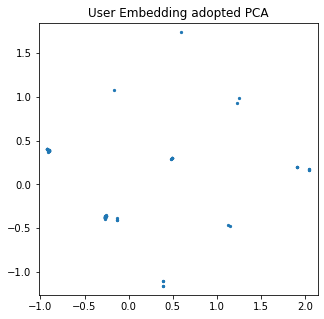

In [22]:
plt.rcParams['figure.figsize'] = [5, 5] # you can change size for your style
plt.xlim(userPoints[:,0].min()-0.1, userPoints[:,0].max()+0.1) # 축 범위 조정
plt.ylim(userPoints[:,1].min()-0.1, userPoints[:,1].max()+0.1) # 축 범위 조정

plt.scatter(userPoints[:,0],userPoints[:,1], s=5)

plt.title('User Embedding adopted PCA')
plt.show()